<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>


### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

In [2]:
data= pd.read_csv("HR_comma_sep.csv")
df=data.copy()

In [3]:
df.shape

(14999, 10)

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# 3. Exploration

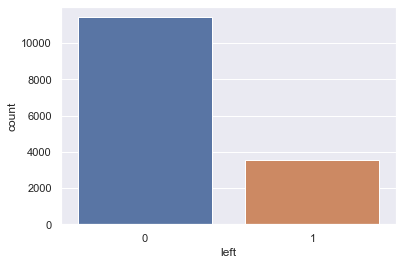

In [8]:
# Count of how many employees left the company
sns.countplot(x='left', data=df)

 Employee turnover is almost 20%

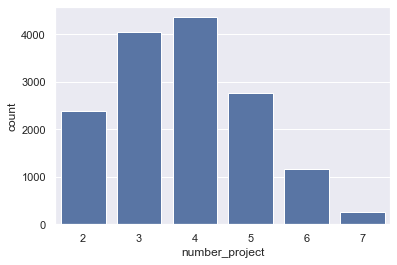

In [9]:
sns.countplot(x='number_project', data=df,color='b')

 Most of the employees are handling 3 to 5 number of projects

In [10]:
df_proj=df.groupby('number_project')['left'].value_counts(normalize=True).reset_index(name='perc')
df_proj['perc']=df_proj['perc']*100

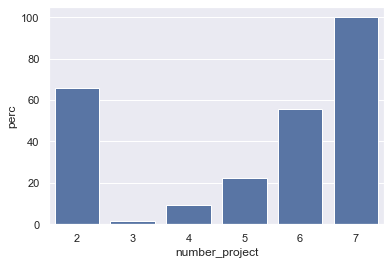

In [11]:
sns.barplot(x='number_project', y='perc', data=df_proj[df_proj['left']==1], color='b')

The above plot shows that the employees handling 6,7 projects or 2 project are most likely to leave. <br>
Reasons concluded:
- either too much workload
- workload not satisfactory

**Time spent at the company**

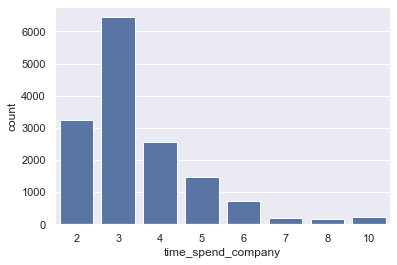

In [12]:
sns.countplot(x='time_spend_company', data=df,color='b')

 The employees are spending 3 years in the company and after 3 to 4 years there is big drop in the employee count.

In [13]:
df_time=df.groupby('time_spend_company')['left'].value_counts(normalize=True).reset_index(name='perc')
df_time['perc']=df_time['perc']*100

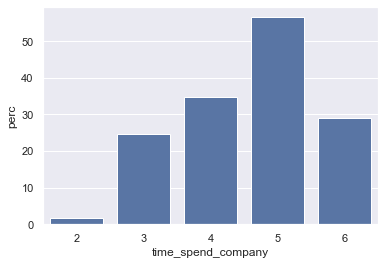

In [14]:
sns.barplot(x='time_spend_company', y='perc', data = df_time[df_time['left']==1],color='b')

Most number of employees are leaving after 5 years. The reason could be that employees might be waiting for certain offer to get matured most probably after 5 years, after achieving this they are leaving the company.

**Employees engaged in any work accident**

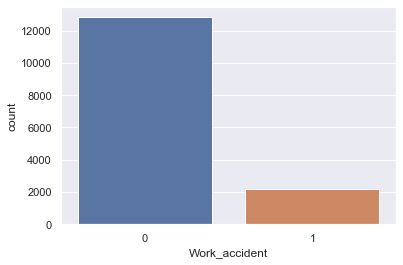

In [15]:
sns.countplot(x='Work_accident', data=df)

 Not many employees have been a victim of any work accident

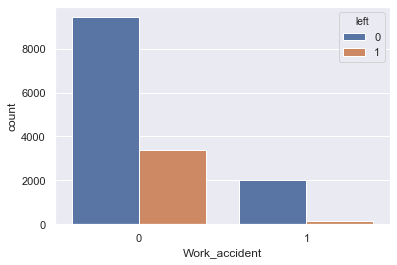

In [16]:
# Number of employees involved in work accident and left or not left
sns.countplot(x='Work_accident',hue='left',data=df)

**Promotions in last 5 years**

In [17]:
df_promoted = df.groupby('promotion_last_5years')['left'].value_counts().reset_index(name='count')
print(df_promoted)

   promotion_last_5years  left  count
0                      0     0  11128
1                      0     1   3552
2                      1     0    300
3                      1     1     19


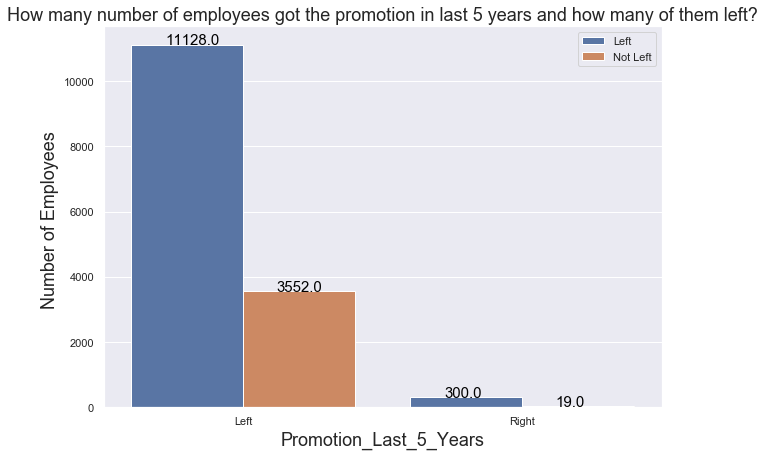

In [18]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x='promotion_last_5years',y='count',hue='left',data=df_promoted)
ax.set_alpha(0.8)
ax.set_title("How many number of employees got the promotion in last 5 years and how many of them left?", fontsize=18)
ax.set_ylabel("Number of Employees ", fontsize=18)
ax.set_xlabel("Promotion_Last_5_Years", fontsize=18)
ax.set_xticklabels(['Left', 'Right'])


ax.legend().set_title("New title")
new_labels = ['Left', 'Not Left']
for t, l in zip(ax.legend().texts, new_labels): t.set_text(l)


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()))), fontsize=15,
                color='black')

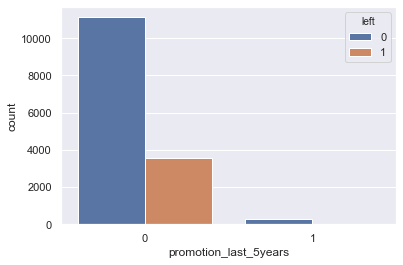

In [19]:
sns.countplot(x='promotion_last_5years', data=df, hue='left')

Plot shows that employees not getting promotions are most likely to churn where as the employees getting promotions are less and not likely to leave.

**Salary trends**

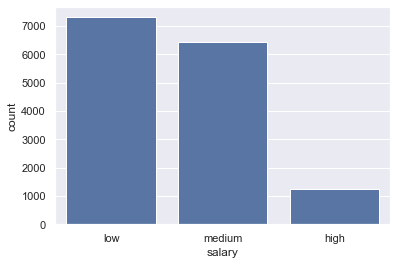

In [20]:
sns.countplot(x='salary',data=df,color='b')

We can see from the graph that less number of emloyees are getting paid highly.

In [21]:
df_sal=df.groupby('salary')['left'].value_counts(normalize=True).reset_index(name='perc')
df_sal['perc']=df_sal['perc']*100

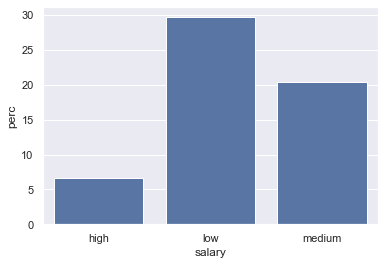

In [22]:
sns.barplot(x='salary',y='perc', data=df_sal[df_sal['left']==1],color='b')

Plot shows that employees with low salary are leaving the country

**Employees per Department**

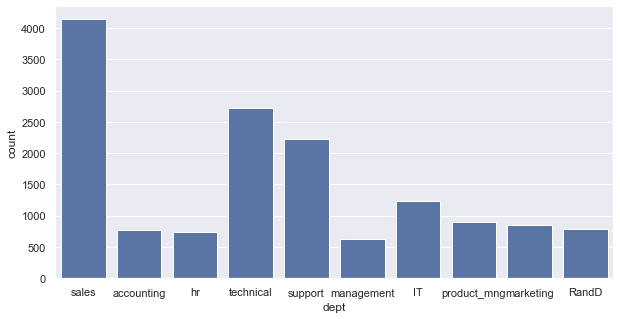

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='dept', data=df,color='b')

The plot shows that sale has most number of employees followed by techincal department and then followed by support

In [24]:
df_dept=df.groupby('dept')['left'].value_counts(normalize=True).reset_index(name='perc')

In [25]:
df_dept

,dept,left,perc
0,IT,0,0.777506
1,IT,1,0.222494
2,RandD,0,0.846252
3,RandD,1,0.153748
4,accounting,0,0.734029
5,accounting,1,0.265971
6,hr,0,0.709066
7,hr,1,0.290934
8,management,0,0.855556
9,management,1,0.144444


In [26]:
df_dept['perc']=df_dept['perc']*100

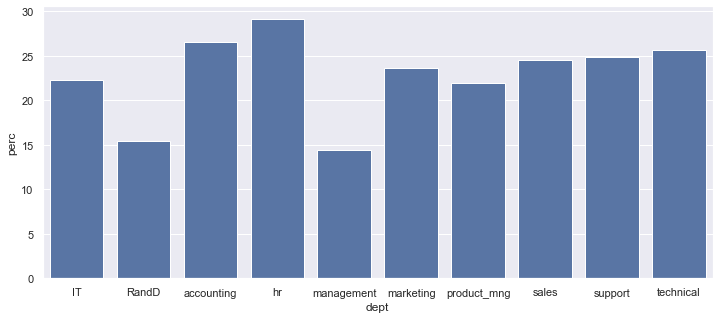

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(x='dept',y='perc', data=df_dept[df_dept['left']==1],color='b')

In [28]:
df_left=df[df['left'] == 1]

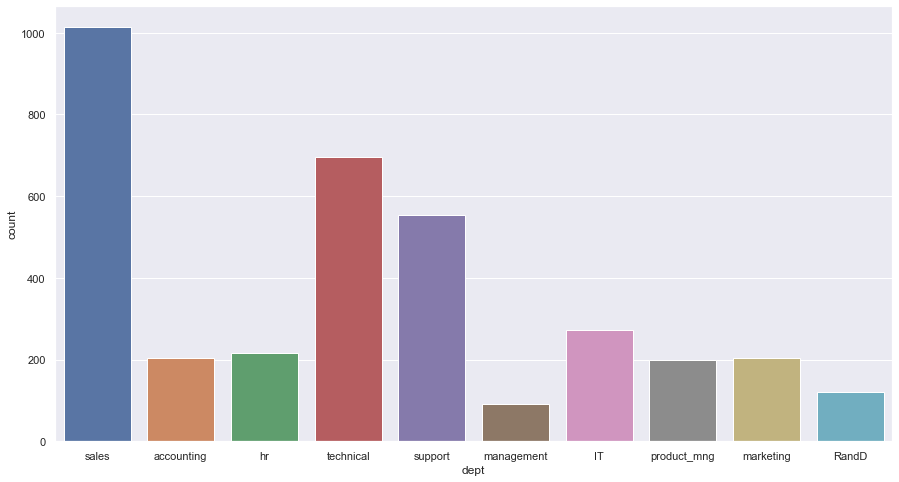

In [29]:
plt.figure(figsize=(15, 8))
sns.countplot(x='dept', data=df[df['left'] == 1])

The plot above is showing that mostly people from HR are leaving the company

**Satisfaction Level**

In [30]:
df['satisfaction_level']

0        0.38
1        0.80
2        0.11
3        0.72
4        0.37
         ... 
14994    0.40
14995    0.37
14996    0.37
14997    0.11
14998    0.37
Name: satisfaction_level, Length: 14999, dtype: float64

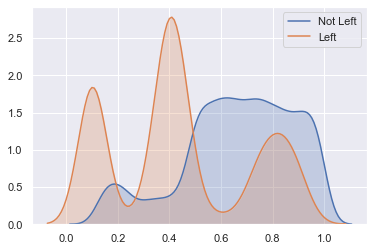

In [31]:
sns.kdeplot(df[df['left'] == 0]['satisfaction_level'], shade=True,label="Not Left");
sns.kdeplot(df[df['left'] == 1]['satisfaction_level'], shade=True,label="Left");

Mostly employees who are leaving have a satisfaction below 0.5. The employees staying in the company have a better satisfaction level.

## Feature Engineering

For feature engineering we will have two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

In [32]:
df['satisfaction_level_type'] = ''

In [33]:
df.loc[df['satisfaction_level']>=0.5, 'satisfaction_level_type']= df.loc[df['satisfaction_level']>=0.5, 'satisfaction_level_type'].replace('','High')
df.loc[df['satisfaction_level']<0.5, 'satisfaction_level_type']=df.loc[df['satisfaction_level']<0.5, 'satisfaction_level_type'].replace('','Low')

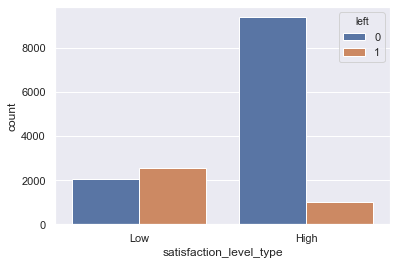

In [34]:
sns.countplot(x='satisfaction_level_type',data=df, hue='left')

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking that satisfaction level type and number of projects in according to that specific type. 

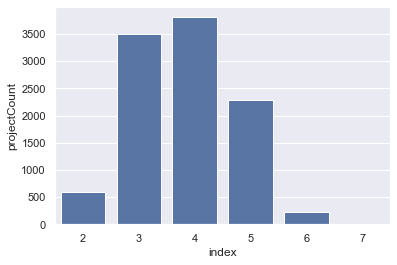

In [35]:
proj_count1= df.loc[df['satisfaction_level_type']=='High','number_project'].value_counts().reset_index(name='projectCount')
sns.barplot(x='index',y='projectCount', data=proj_count1, color='b')

As you can see that higher satisfaction level is associated with the number of projects such that number of projects per employee are in the range of 3 to 5. 

Now lets check number of projects for low satisfaction level

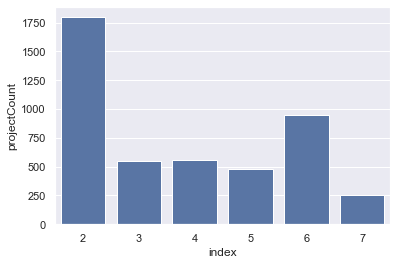

In [36]:
proj_count2= df.loc[df['satisfaction_level_type']=='Low','number_project'].value_counts().reset_index(name='projectCount')
sns.barplot(x='index',y='projectCount', data=proj_count2, color='b')

Notice that people associated with low satisfaction level have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant rise if compare to its count with higher satisfaction level.

In [37]:
df['employee_type']=''

In [38]:
df.loc[df['number_project']==2,'employee_type']=df.loc[df['number_project']==2,'employee_type'].replace('','unburdened')
df.loc[(df['number_project']>=3) & (df['number_project']<=5),'employee_type']=df.loc[(df['number_project']>=3) & (df['number_project']<=5),'employee_type'].replace('','Satisfactory')
df.loc[df['number_project']>=6,'employee_type']=df.loc[df['number_project']>=6,'employee_type'].replace('','Burdened')

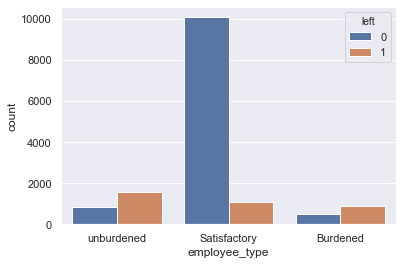

In [39]:
sns.countplot(x='employee_type',data=df,hue='left')

In [40]:
df_proj_st=df.groupby('employee_type')['left'].value_counts(normalize=True).reset_index(name='perc')
df_proj_st['perc']=df_proj_st['perc']*100

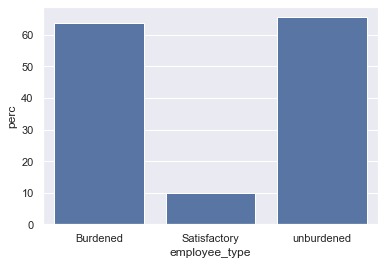

In [41]:
sns.barplot(x='employee_type',y='perc',data=df_proj_st[df_proj_st['left']==1],color='b')

# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

In [42]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary', 'satisfaction_level_type',
       'employee_type'],
      dtype='object')

In [43]:
df_onehot=pd.get_dummies(df,columns=['dept','salary','satisfaction_level_type','employee_type'])
df_onehot.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Burdened,employee_type_Satisfactory,employee_type_unburdened
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [44]:
df=df_onehot.copy()

In [45]:
X=df.drop('left', axis=1)
Y=df['left']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
xtrain, xtest, ytrain, ytest= train_test_split(X,Y, test_size=0.3, random_state=100)
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(10499, 25) (10499,)
(4500, 25) (4500,)


## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_clf= RandomForestClassifier(random_state=100)

In [50]:
rf_clf.fit(xtrain,ytrain)

C:\Users\sadia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [51]:
rf_pred=rf_clf.predict(xtest)
rf_pred_prob=rf_clf.predict_proba(xtest)[:1]

**Confusion Matrix**

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
tn, fp, fn, tp = confusion_matrix(ytest, rf_pred).ravel()


In [54]:
conf_matrix=pd.DataFrame({"pred_leave":[tp,fp],"pred_not-leave":[fn,tn]},index=["leave","not-leave"])
conf_matrix

,pred_leave,pred_not-leave
leave,1061,38
not-leave,8,3393


**Precision**

In [84]:
from sklearn.metrics import precision_score

In [56]:
rf_precion= precision_score(ytest,rf_pred)
rf_precion

0.9925163704396632

**Accuracy**

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
rf_acc=accuracy_score(ytest,rf_pred)
rf_acc

0.9897777777777778

**Recall**

In [59]:
from sklearn.metrics import recall_score

In [60]:
rf_recall=recall_score(ytest,rf_pred)
rf_recall

0.9654231119199272

**F1-Score**

In [61]:
from sklearn.metrics import f1_score

In [62]:
rf_f1_score=f1_score(ytest,rf_pred)
rf_f1_score

0.9787822878228781

**Classification Report**

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3401
           1       0.99      0.97      0.98      1099

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr_clf= LogisticRegression(random_state=100)

In [67]:
lr_clf.fit(xtrain,ytrain)

C:\Users\sadia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
lr_pred=lr_clf.predict(xtest)
lr_pred_prob= lr_clf.predict_proba(xtest)[:1]

**Accuracy**

In [69]:
lr_accuracy=accuracy_score(ytest,lr_pred)
lr_accuracy

0.8806666666666667

**Precision**

In [70]:
lr_precision=precision_score(ytest,lr_pred)
lr_precision

0.7691570881226054

**Recall**

In [71]:
lr_recall=recall_score(ytest,lr_pred)
lr_recall

0.7306642402183804

**F1 Score**

In [72]:
lr_f1_score=f1_score(ytest,lr_pred)
lr_f1_score

0.7494167055529631

**Classification Report**

In [73]:
print(classification_report(ytest,lr_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3401
           1       0.77      0.73      0.75      1099

    accuracy                           0.88      4500
   macro avg       0.84      0.83      0.84      4500
weighted avg       0.88      0.88      0.88      4500



## Ada Boost

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=100)

In [76]:
pred_clf_adb=clf_adb.predict(xtest)

**Accuracy**

In [77]:
ab_accuracy= accuracy_score(ytest,pred_clf_adb)
ab_accuracy

0.9588888888888889

**Precision**

In [78]:
ab_precision= precision_score(ytest, pred_clf_adb)
ab_precision

0.9147005444646098

**Recall**

In [79]:
ab_recall= recall_score(ytest, pred_clf_adb)
ab_recall

0.9171974522292994

**F1-Score**

In [80]:
ab_f1_score=f1_score(ytest, pred_clf_adb)
ab_f1_score

0.9159472966833256

**Classification Report**

In [81]:
print(classification_report(ytest,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3401
           1       0.91      0.92      0.92      1099

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



# Result Comparisons

In [82]:
compare_dict={"Model":['Random Forest','Logistic Regression','Ada Boost'],
              "Accuracy":[rf_acc,lr_accuracy,ab_accuracy],
              "Precision":[rf_precion, lr_precision,ab_precision],
              "Recall":[rf_recall,lr_recall,ab_recall],
              "F1_Score":[rf_f1_score,lr_f1_score,ab_f1_score]}

In [83]:
comparison=pd.DataFrame(compare_dict)
comparison.sort_values(['F1_Score'], ascending=False)

,Model,Accuracy,Precision,Recall,F1_Score
0,Random Forest,0.989778,0.992516,0.965423,0.978782
2,Ada Boost,0.958889,0.914701,0.917197,0.915947
1,Logistic Regression,0.880667,0.769157,0.730664,0.749417


The accuracy is already very good,so no tuning required. Random Forest performs the best. 